In [61]:
!pip install pymorphy2

In [62]:
import os
import re
from collections import defaultdict
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
from tqdm import tqdm
import gensim
import pymorphy2
from transformers import MBartTokenizer, MBartForConditionalGeneration
from google.colab import drive
import string
pd.set_option('display.max_columns', 600)

In [63]:
morph = pymorphy2.MorphAnalyzer()

In [64]:
texts = []
file_path = 'articles_data.csv'
df = pd.read_csv(file_path)
content_values = df['Content'].tolist()
for value in content_values:
    texts.append(value)
def clear_text(t):
    t = str(t).lower()
    t = t.replace('\n', '  ')
    t = t.replace('.', '. ')
    t = t.replace(',', ', ')
    t = t.replace('ха0', ' ')
    return ' '.join(re.findall('[a-za-яё]+', t))
texts_cleared = []
for text in texts:
    texts_cleared.append(clear_text(text))
print(texts_cleared[0])

в настоящее время в россии около семей не могут стать родителями в году таких семей было несложно сделать вывод о том что тенденция отнюдь не утешительная количество бесплодных пар увеличивается репродуктивные психологи выделяют основных причин психологического бесплодия давайте разбираться в них психологическое бесплодие что это и что с ним делать о том что такое психологическое бесплодие не знают не только пары которые хотят стать родителями но даже некоторые врачи поэтому женщины и мужчины часто просто не находят адекватной поддержки и необходимой информации обычно пары получают только банальные советы из категории «перестаньте ждать» «расслабьтесь» «все случится само» «вам помогут современные технологии» но это не работает на самом деле психосоматическое бесплодие может стать причиной неудач даже при эко поэтому очень важно комплексно подходить к проблеме врач работающий с парой должен понимать что шанс стать родителем есть у каждого также он должен осознавать и то что психологичес

In [65]:
text_lens = [len(t.split()) for t in texts_cleared]

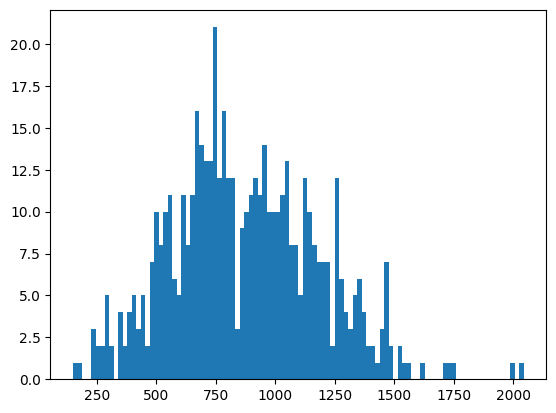

In [66]:
plt.hist(text_lens, bins=100)
plt.show()

In [67]:
texts_tokenized = [t.split() for t in texts_cleared]


In [68]:
texts_tokenized[-len(texts_tokenized)]

['в',
 'настоящее',
 'время',
 'в',
 'россии',
 'около',
 'семей',
 'не',
 'могут',
 'стать',
 'родителями',
 'в',
 'году',
 'таких',
 'семей',
 'было',
 'несложно',
 'сделать',
 'вывод',
 'о',
 'том',
 'что',
 'тенденция',
 'отнюдь',
 'не',
 'утешительная',
 'количество',
 'бесплодных',
 'пар',
 'увеличивается',
 'репродуктивные',
 'психологи',
 'выделяют',
 'основных',
 'причин',
 'психологического',
 'бесплодия',
 'давайте',
 'разбираться',
 'в',
 'них',
 'психологическое',
 'бесплодие',
 'что',
 'это',
 'и',
 'что',
 'с',
 'ним',
 'делать',
 'о',
 'том',
 'что',
 'такое',
 'психологическое',
 'бесплодие',
 'не',
 'знают',
 'не',
 'только',
 'пары',
 'которые',
 'хотят',
 'стать',
 'родителями',
 'но',
 'даже',
 'некоторые',
 'врачи',
 'поэтому',
 'женщины',
 'и',
 'мужчины',
 'часто',
 'просто',
 'не',
 'находят',
 'адекватной',
 'поддержки',
 'и',
 'необходимой',
 'информации',
 'обычно',
 'пары',
 'получают',
 'только',
 'банальные',
 'советы',
 'из',
 'категории',
 '«перестаньте

In [69]:
with open('stopwords-ru.txt', 'r') as f:
    stop_words = f.read().split('\n')

In [70]:
stop_words_ = """или, но, дабы, затем, потом, лишь только, он, мы, его, вы, вам, вас, ее, что,
который, их, все, они, я, весь, мне, меня, таким, для, на, по, со, из, от, до, без, над, под, за, при, после, во,
же, то, бы, всего, итого, даже, да, нет, ой, ого, эх, браво, здравствуйте, спасибо, извините,
скажем, может, допустим, честно говоря, например, на самом деле, однако, вообще, в, общем, вероятно, очень,
минимально, максимально, абсолютно, огромный, предельно, сильно, слабо, самый, сайт, давать, всегда, однако, и, а, но, да, если, что, когда, потому, что, так, как, как, будто,
вследствие, того, что, с, тех, пор, как, в, то, время, как, для, того, чтобы, ни, то, ли, но, зато, от, и, к"""

stop_words_1  = set(stop_words + stop_words_.replace('\n','').split(', '))

In [71]:
len(stop_words_1)

586

In [72]:
@lru_cache(100000)
def lemmatize(s):
    s = str(s).lower()
    return morph.parse(s)[0].normal_form

In [73]:
texts_tokenized_1 = [[lemmatize(tt) for tt in t if len(tt) > 1]
                     for t in tqdm(texts_tokenized)]

100%|██████████| 522/522 [00:07<00:00, 73.22it/s] 


In [74]:
texts_tokenized_1 = [[tt for tt in t if tt not in stop_words_1]
                     for t in texts_tokenized_1]

In [75]:
texts_tokenized_1[-len(texts_tokenized_1)]

['настоящий',
 'семья',
 'родитель',
 'семья',
 'несложно',
 'вывод',
 'тенденция',
 'отнюдь',
 'утешительный',
 'количество',
 'бесплодный',
 'пара',
 'увеличиваться',
 'репродуктивный',
 'психолог',
 'выделять',
 'основный',
 'причина',
 'психологический',
 'бесплодие',
 'разбираться',
 'психологический',
 'бесплодие',
 'психологический',
 'бесплодие',
 'пара',
 'родитель',
 'врач',
 'поэтому',
 'мужчина',
 'находить',
 'адекватный',
 'поддержка',
 'необходимый',
 'информация',
 'пара',
 'получать',
 'банальный',
 'совет',
 'категория',
 '«перестать',
 'ждать»',
 '«расслабьтесь»',
 '«все',
 'случиться',
 'само»',
 '«во',
 'помочь',
 'современный',
 'технологии»',
 'психосоматический',
 'бесплодие',
 'причина',
 'неудача',
 'эко',
 'поэтому',
 'важно',
 'комплексно',
 'подходить',
 'проблема',
 'врач',
 'пара',
 'шанс',
 'родитель',
 'осознавать',
 'психологический',
 'бесплодие',
 'являться',
 'психосоматический',
 'заболевание',
 'причина',
 'крыться',
 'внутренний',
 'психологическ

In [76]:
ttfs = defaultdict(int)
dfs = defaultdict(int)

In [77]:
for t in texts_tokenized_1:
    for term in set(t):
        if len(term) > 1:
            ttfs[term] += t.count(term)
            dfs[term] += 1

In [78]:
len(dfs), len(ttfs)

(14061, 14061)

In [79]:
list(dfs.keys())[:10]

['диагностироваться',
 '«болевые»',
 'бесплодный',
 'вариант',
 'добиваться',
 'здоровый',
 'беспомощность',
 'перемена',
 'забота',
 'ставить']

In [80]:
df_dfs = pd.DataFrame({'cnt_dfs': pd.Series(dfs), 'cnt_ttfs': pd.Series(ttfs)})
df_dfs.index.name = 'term'
df_dfs = df_dfs.reset_index()
df_dfs = df_dfs.sort_values('cnt_ttfs', ascending=False)

In [81]:
df_dfs

,term,cnt_dfs,cnt_ttfs
397,врач,516,4440
203,пациент,447,3015
470,лечение,474,2813
193,заболевание,432,2037
249,специалист,470,1795
...,...,...,...
9045,размокать,1,1
9044,сковывать,1,1
9042,аммиак,1,1
9039,заглушить,1,1


In [82]:
df_dfs_1 = df_dfs[(df_dfs['cnt_ttfs'] > 1)]

In [83]:
dfs_1 = df_dfs_1.to_dict('records')

In [84]:
dfs_1 = {i['term']: i['cnt_dfs'] for i in dfs_1}

In [85]:
dfs_1

{'врач': 516,
 'пациент': 447,
 'лечение': 474,
 'заболевание': 432,
 'специалист': 470,
 'патология': 375,
 'проводиться': 408,
 'являться': 435,
 'процедура': 361,
 'позволять': 439,
 'диагностика': 371,
 'ребёнок': 259,
 'обследование': 379,
 'причина': 356,
 'исследование': 309,
 'состояние': 393,
 'важно': 392,
 'препарат': 325,
 'эко': 88,
 'приём': 393,
 'проведение': 365,
 'зрение': 143,
 'нарушение': 340,
 'вмешательство': 235,
 'метод': 317,
 'медсить': 503,
 'следовать': 343,
 'развитие': 340,
 'орган': 290,
 'операция': 185,
 'процесс': 351,
 'терапия': 252,
 'результат': 325,
 'современный': 386,
 'беременность': 194,
 'необходимый': 398,
 'офтальмолог': 118,
 'клиника': 361,
 'обратиться': 462,
 'помощь': 341,
 'высокий': 348,
 'наличие': 320,
 'возможность': 347,
 'др': 281,
 'методика': 275,
 'симптом': 240,
 'различный': 334,
 'риск': 303,
 'специальный': 326,
 'осложнение': 264,
 'медицинский': 293,
 'ткань': 232,
 'проводить': 322,
 'использование': 306,
 'проблема':

In [86]:
terms = set(dfs_1.keys())

In [87]:
len(terms)

8856

In [88]:
texts_tokenized_2 = [[tt for tt in t if tt in terms] for t in texts_tokenized_1]

In [89]:
text_lens = [len(t) for t in texts_tokenized_2]

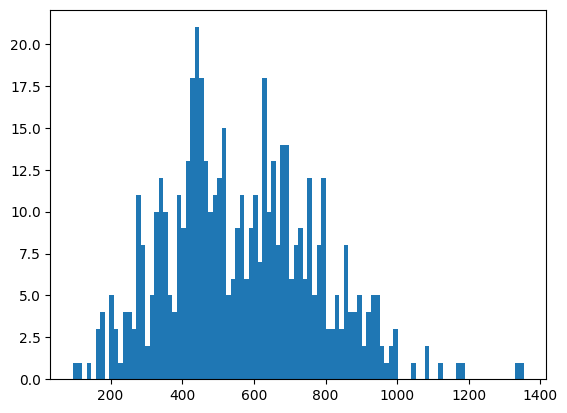

In [90]:
plt.hist(text_lens, bins=100)
plt.show()

In [91]:
%%time

model = gensim.models.FastText(texts_tokenized_2, min_count=1, negative=5,
                               vector_size=20, window=5, workers=16)

CPU times: user 38 s, sys: 116 ms, total: 38.2 s
Wall time: 21.5 s


In [92]:
vars(model.wv)

{'vector_size': 20,
 'index_to_key': ['врач',
  'пациент',
  'лечение',
  'заболевание',
  'специалист',
  'патология',
  'проводиться',
  'являться',
  'процедура',
  'позволять',
  'диагностика',
  'ребёнок',
  'обследование',
  'причина',
  'исследование',
  'состояние',
  'важно',
  'препарат',
  'эко',
  'приём',
  'проведение',
  'зрение',
  'нарушение',
  'вмешательство',
  'метод',
  'медсить',
  'следовать',
  'развитие',
  'орган',
  'операция',
  'процесс',
  'терапия',
  'результат',
  'современный',
  'беременность',
  'необходимый',
  'офтальмолог',
  'клиника',
  'обратиться',
  'помощь',
  'высокий',
  'наличие',
  'возможность',
  'др',
  'методика',
  'симптом',
  'различный',
  'риск',
  'специальный',
  'осложнение',
  'медицинский',
  'ткань',
  'проводить',
  'использование',
  'проблема',
  'консультация',
  'особенность',
  'фактор',
  'анализ',
  'необходимо',
  'возможный',
  'организм',
  'необходимость',
  'кровь',
  'центр',
  'система',
  'выявить',
  'зуб

In [93]:
model.wv.vectors_vocab = None
model.wv.vectors = model.wv.vectors.astype(np.float16)
model.wv.vectors_ngrams = model.wv.vectors_ngrams.astype(np.float16)

In [94]:
model.wv.vectors.shape

(8856, 20)

In [95]:
model.wv.vectors_ngrams.shape
#Fixed count

(2000000, 20)

In [96]:
def text_vec(t):
    res = np.zeros(20)
    cnt = 0
    for tt in t[:60]:
        try:
            res += model.wv[tt]
            cnt += 1
        except:
            pass
    if cnt > 0:
        return res / (cnt * np.linalg.norm(res / cnt))
    else:
        return res

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [97]:
np.linalg.norm(text_vec(texts_tokenized_2[0]))

1.0

In [98]:
texts_mean_vect = [text_vec(t) for t in tqdm(texts_tokenized_2)]

100%|██████████| 522/522 [00:00<00:00, 4350.63it/s]


In [99]:
texts_mean_vect[0].shape

(20,)

In [100]:
np_texts_mean_vect = np.vstack(texts_mean_vect)

In [101]:
np_texts_mean_vect.shape

(522, 20)

In [102]:
query = 'овуляция'

In [103]:
vect_query = text_vec(query.split()).reshape(-1,1) / np.linalg.norm(text_vec(query.split()))
vect_query

array([[ 0.01647855],
       [-0.42280088],
       [ 0.12462828],
       [ 0.35005775],
       [ 0.12707779],
       [-0.28444048],
       [ 0.16701229],
       [-0.07574935],
       [ 0.09374956],
       [-0.03282719],
       [-0.13398097],
       [ 0.20768906],
       [-0.02681475],
       [-0.00093944],
       [-0.34411954],
       [ 0.18423311],
       [-0.16938757],
       [-0.52315671],
       [-0.01343521],
       [ 0.16003488]])

In [104]:
vect_query.shape

(20, 1)

In [105]:
np.linalg.norm(vect_query)

1.0

In [106]:
relevance = np.matmul(np_texts_mean_vect, vect_query)

In [107]:
relevance.shape

(522, 1)

In [108]:
top_ind = (-relevance.flatten()).argsort()
top_ind

array([512,  57, 285,  79,  80, 511,  52,   4, 520,  66, 314,  81, 228,
        84, 231, 519,  94,  74,  92, 312, 521,  67,  26,  27,  88, 513,
       310, 514,  20, 309, 518, 311,  96,   1,  76,  75,  93, 225,  72,
        38, 227,  95,  78,  53, 409,  87, 434,  21,  89, 290,  85,  55,
       485,  77,  82,  83, 442, 220,   3, 407, 425,  90, 363, 229, 278,
       308, 436, 194, 166, 510,   5, 465, 412,  69, 245, 454, 260, 430,
       206, 486, 365, 431, 429,  54, 406, 232,  73, 101, 329, 282, 161,
       313, 463,  36, 495,  91, 481, 221, 344, 291, 443, 402, 482, 234,
       428, 475,  37, 488, 307, 289, 215, 468, 203, 401, 502, 294, 473,
       320, 293, 496, 477, 109, 459, 200, 422, 226,  65, 235, 414,  68,
       179,  12, 466, 381, 450, 421,  58, 233, 415, 165, 266,  51,  59,
       199, 237, 325, 122, 321, 500, 499, 491, 492, 261, 474, 382, 286,
       494, 191,  86, 345, 432, 455, 480, 287, 354, 257, 458, 136,  97,
       368, 490, 265, 283, 411, 204,  35, 162,   2, 350, 243, 43

In [109]:
print(texts[79])

Пункция яичников (фолликулов) при ЭКО представляет собой малое хирургическое вмешательство. При такой манипуляции получают яйцеклетки для последующего оплодотворения в условиях лаборатории эмбриологии. Процедура завершает фазу стимуляции яичников. Она является важнейшим этапом протокола экстракорпорального оплодотворения.
Правильное проведение пункции при ЭКО во многом определяет здоровье репродуктивной системы женщины. Именно поэтому важно, чтобы задача решалась исключительно опытными и квалифицированными специалистами.
Давайте разберемся, как происходит забор яйцеклеток для ЭКО, какие показания и противопоказания имеет процедура, как правильно восстановиться после нее?
Показания и противопоказания к пункции фолликулов
В большинстве случаев предварительно обеспечивается стимуляция овуляции, которая подразумевает назначение специальных препаратов – индукторов овуляции – для одновременного созревания 10-20 фолликулов. Благодаря этому повышают вероятность отбора для оплодотворения не одн

In [110]:
text_lens = [len(t) for t in texts_tokenized_2]